# Colour Space Tutorial
This tutoi
By Pac Hung and Zac Todd

In [17]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

IMAGES_DIR = f"{os.getcwd()}/resources"

By default opencv (cv2) loads images in the format (Blue, Green, Red) and matplot.pylpot (plt) loads images as RGB. However both cv2 and plt do load the image into the same type np.ndarray and with the same shape (width, height, colour channels).

In [21]:
COLOUR_IMAGE_PATH = f"{IMAGES_DIR}/color.jpg"
cv2_image = cv2.imread(COLOUR_IMAGE_PATH)
plt_image = plt.imread(COLOUR_IMAGE_PATH)

print(f"cv2_image type: {type(cv2_image)}, shape {cv2_image.shape}.")
print(f"plt_image type: {type(plt_image)}, shape {plt_image.shape}.")

cv2_image type: <class 'numpy.ndarray'>, shpe (224, 225, 3).
plt_image type: <class 'numpy.ndarray'> shape (224, 225, 3).


Though we are showing the images using plt, cv2 does have an image viewer it is just less freindly with jupyter notebook.
To show an image using cv2 you can uses the following:
```python
cv2.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

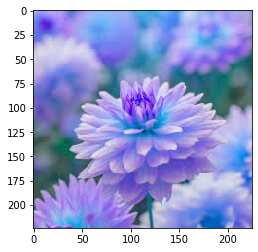

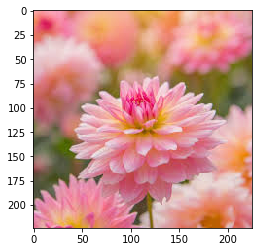

In [23]:
# showing BGR as RGB
plt.imshow(cv2_image)
plt.show()

# showing RGB as RGB
plt.imshow(plt_image)
plt.show()

Below shows th image in different colour spaces (Note that plt shows grey scale images in blue to yellow rather than black and white).

In [43]:
def change_show_colorspace(image, spaces, names):
    """
    Convert the image's color space.
    """
    # convert the image to different color space
    # including hsv, gray, yuv, ycrcb
    plt.imshow(image)
    plt.title(f"RGB {image.shape}")
    plt.show()
    for s, n in zip(spaces, names):
        cvt_image = image.copy()
        cvt_image = cv2.cvtColor(image, s)
        plt.imshow(cvt_image)
        
        # space name and image shape.
        plt.title(f"{n} {cvt_image.shape}")
        plt.show()

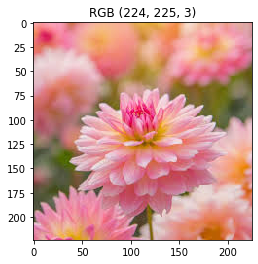

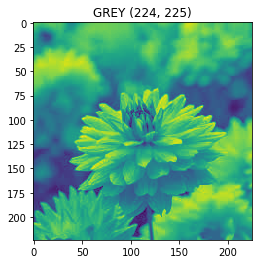

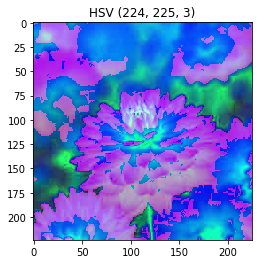

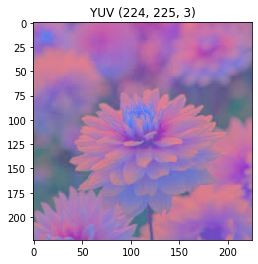

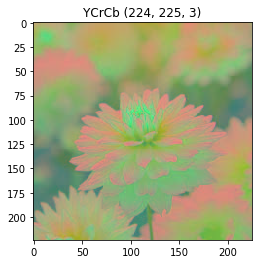

In [44]:
# For operations with different options cv2 uses constant flags to communicate what options is being picked.
colour_spaces = (cv2.COLOR_RGB2GRAY, cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2YUV, cv2.COLOR_RGB2YCrCb)
names = ("GREY", "HSV", "YUV", "YCrCb")
change_show_colorspace(plt_image, colour_spaces, names)

In [ ]:
def select_black_from_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # find the black parts of the image accroding to its hsv value
    lower_hsv = np.array([0, 0, 0])
    upperb_hsv = np.array([180, 255, 46])
    mask = cv2.inRange(hsv, lowerb=lower_hsv, upperb=upperb_hsv)
    plt.imshow("image_mask", mask)
    plt.imshow("image_original", image)

In [ ]:
def fill_color(image):
    # copy the image
    copyImg = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros([h + 2, w + 2], np.uint8)
    # use floodfill algorithm to fill the image with specific color
    # the usage of floodfill:
    # https://stackoverflow.com/questions/46036172/irregular-shape-detection-and-measurement-in-python-opencv/46084597#46084597
    cv2.floodFill(copyImg, mask, (30, 30), (0, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)
    plt.imshow("fill color", copyImg)